<a href="https://colab.research.google.com/github/HssngH/ToBigs18/blob/main/%5B%ED%88%AC%EB%B9%85%EC%8A%A4_18%EA%B8%B0_%EC%A0%95%EA%B7%9C%EC%84%B8%EC%85%98%5D_2%EC%A3%BC%EC%B0%A8_Regression_%EA%B3%BC%EC%A0%9C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [ ]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("./drive/MyDrive/Colab Notebooks/ToBigs/week2_regression&optimization/assignment2_train-data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [ ]:
# data 필요없는 첫번째 칼럼 'Unnamed: 0' 삭제해주기
data = data.drop(['Unnamed: 0'], axis=1)

In [ ]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
# 결측치 확인하기
data.isnull().sum()

# New_Price Null값이 너무 많아서 칼럼 삭제해주기
data = data.drop(['New_Price'], axis=1)

# 나머지 Null값 삭제해주기 
data = data.dropna(axis=0)

In [ ]:
# 변수별 값 분포 확인하기
for col in data.columns:
    print(col)
    print(data[col].value_counts())
    print('-----------------------')

Name
Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1855, dtype: int64
-----------------------
Location
Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: Location, dtype: int64
-----------------------
Year
2014    795
2015    741
2016    740
2013    648
2017    586
2012    572
2011    461
2010    339
2018    298
2009    196
2008    169
2007    123
2019    102
2006     75
2005     55
2004     29
2003     15
2002     14
2001      7
2000      4
1998      4
1999      2
Name: Y

In [ ]:
# Mileage, Engine, Power 단위 없애고 dtype numeric으로 바꿔주기

# Mileage
data['Mileage'] = data.Mileage.str.split(' ').str[0]
data['Mileage'] = pd.to_numeric(data['Mileage'])

# Engine
data['Engine'] = data.Engine.str.split(' ').str[0]
data['Engine'] = pd.to_numeric(data['Engine'])

# Power
data['Power'] = data.Power.str.split(' ').str[0]
data['Power'] = data['Power'].apply(lambda x: None if x == "null" else x)
data['Power'] = pd.to_numeric(data['Power'])

data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   int64  
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 596.4+ KB


DataType : int ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


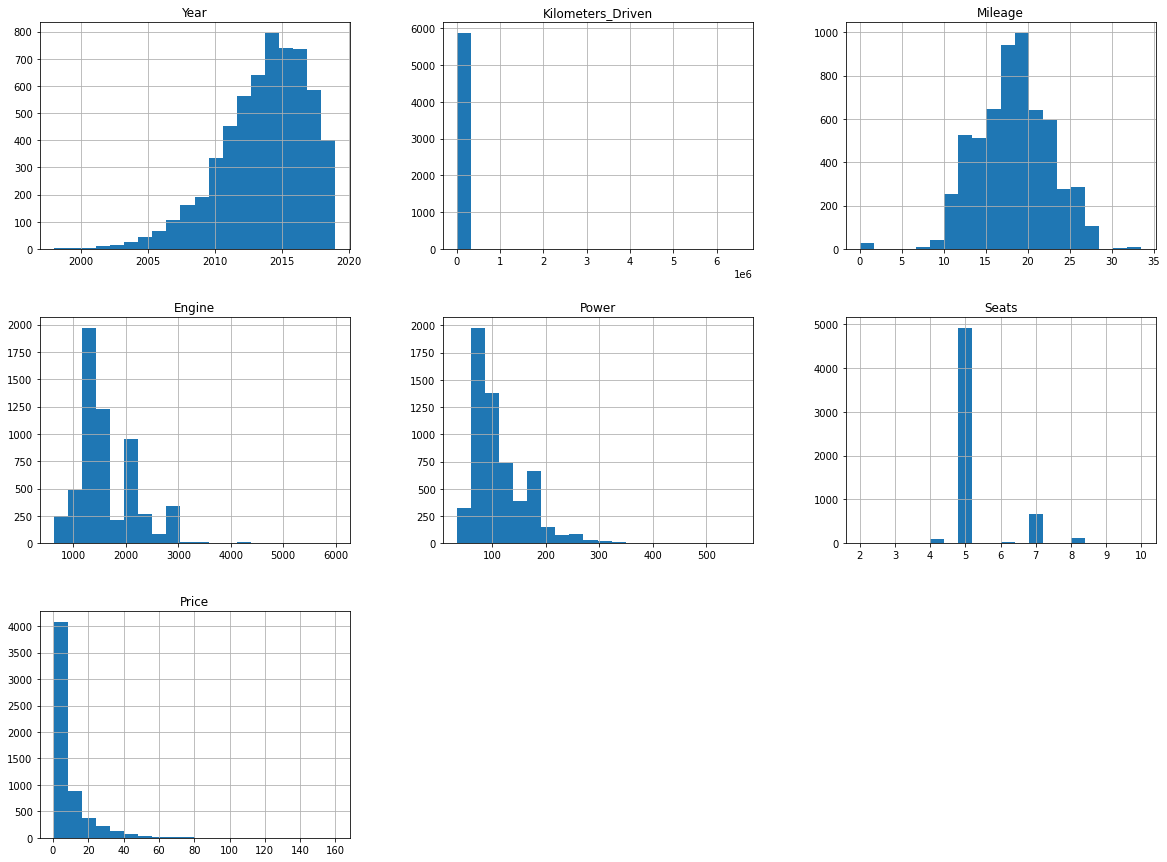

In [ ]:
# scaling 해주기
# 변수별로 분포 확인하기
int_list = []
obj_list = []

for col in data.columns:
    if data[col].dtype != 'object':
        int_list.append(col)
    else:
        obj_list.append(col)

print('DataType : int', int_list)

data[int_list].hist(bins=20, figsize=(20,15));

# 한쪽으로 치우쳐져 있는 'Kilometers_Driven', 'Engine', 'Power', 'Seats', 'Price' 로그변환해주기

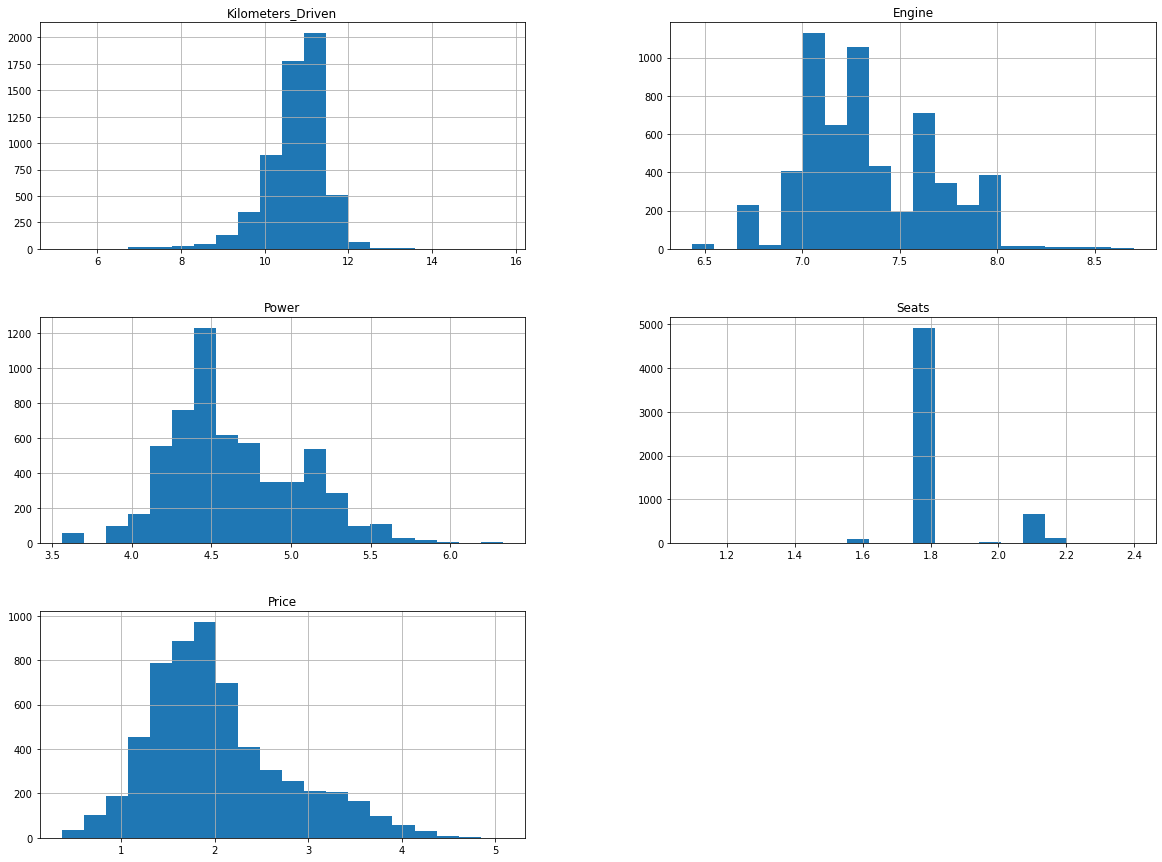

In [ ]:
# 로그변환

# int_list에서 로그변환하지 않을 변수 빼기
int_list.remove('Year')
int_list.remove('Mileage')

# 로그변환해주고 난 뒤의 그래프 확인
data[int_list] = np.log1p(data[int_list])

data[int_list].hist(bins=20, figsize=(20,15));

In [ ]:
# obj 더미변수로 변경해주기

# obj_list에서 Name 제외
obj_list.remove('Name')

# 더미변수로 변경
data_scaled = pd.get_dummies(data, columns = obj_list, drop_first=True)

In [ ]:
# 회귀분석 진행하기 앞서 statsmodels 사용하기 위해 임포트해주기
# statsmodels의 ali 사용하기
import statsmodels.api as sm

In [ ]:
# y값과 X값 지정해주기
y = data_scaled['Price']
X = data_scaled.drop(['Price', 'Name'], axis=1)

In [ ]:
# 모델 적합
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                          1.153e+04
Date:                Mon, 01 Aug 2022   Prob (F-statistic):                        0.00
Time:                        15:50:35   Log-Likelihood:                         -1606.3
No. Observations:                5872   AIC:                                      3259.
Df Residuals:                    5849   BIC:                                      3412.
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Year                      -8.395e-05      0.000     -0.700      0.484      -0.000       0.000
Kilometers_Driven            -0.2725      0.007    -41.583      0.000      -0.285      -0.260
Mileage                       0.0018      0.002      1.060      0.289      -0.002       0.005
Engine                       -0.0335      0.040     -0.843      0.399      -0.111       0.044
Power                         1.1128      0.028     40.426      0.000       1.059       1.167
Seats                         0.2910      0.045      6.485      0.000       0.203       0.379
Location_Bangalore            0.1430      0.028      5.175      0.000       0.089       0.197
Location_Chennai             -0.0038      0.026     -0.147      0.883      -0.055       0.047
Location_Coimbatore           0.2623      0.025     10.464      0.000       0.213       0.311
Location_Delhi               -0.0264      0.026     -1.036      0.300      -0.076       0.024
Location_Hyderabad            0.0957      0.025      3.883      0.000       0.047       0.144
Location_Jaipur              -0.0040      0.027     -0.149      0.882      -0.057       0.049
Location_Kochi                0.1331      0.025      5.323      0.000       0.084       0.182
Location_Kolkata             -0.2794      0.026    -10.842      0.000      -0.330      -0.229
Location_Mumbai              -0.1039      0.025     -4.231      0.000      -0.152      -0.056
Location_Pune                -0.0295      0.025     -1.165      0.244      -0.079       0.020
Fuel_Type_Diesel              0.0282      0.044      0.637      0.524      -0.059       0.115
Fuel_Type_LPG                -0.2244      0.110     -2.033      0.042      -0.441      -0.008
Fuel_Type_Petrol             -0.3250      0.045     -7.223      0.000      -0.413      -0.237
Transmission_Manual          -0.2962      0.013    -23.671      0.000      -0.321      -0.272
Owner_Type_Fourth & Above    -0.3369      0.121     -2.786      0.005      -0.574      -0.100
Owner_Type_Second            -0.1826      0.012    -15.206      0.000      -0.206      -0.159
Owner_Type_Third             -0.3765      0.033    -11.438      0.000      -0.441      -0.312
==============================================================================
Omnibus:                      360.624   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1007.154
Skew:                          -0.324   Prob(JB):                    1.99e-219
Kurtosis:                       4.923   Cond. No.                     5.85e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix o

R-squared 값이 0.978으로 모델의 설명력이 높은 걸 알 수 있다. <br>
또한 F-statistic값이 1.153e+04이며, Prob (F-statistic)이 0.00이므로 회귀식이 유의미하다 할 수 있다. <br>
Year, Mileage, Engine, Location_Chennai, Location_Delhi, Location_jaipur, Location_Pune, Fuel_Type_Diesel 제외한 나머지 변수들의 p-value < 0.05이므로, 나머지 변수들은 통계적으로 유의미하다 할 수 있다.<br>
Durbin-Watson 값이 1.962로 잔차들이 독립적이라 해석할 수 있다.

In [ ]:
from sklearn.model_selection import train_test_split
# 데이터를 train과 test로 분리
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)

pred = model.predict(x_train)

In [ ]:
print('회귀계수', model.coef_)
print('절편',model.intercept_)

회귀계수 [ 8.46523136e-02 -1.04226881e-01 -1.42564852e-02  1.73110337e-01
  9.18065691e-01 -1.30224019e-01  1.42180962e-01  1.26528303e-02
  1.15856201e-01 -3.44371703e-02  1.16144923e-01  4.59421191e-04
 -3.13968935e-03 -1.97661403e-01 -6.23274283e-02 -2.72912681e-02
  2.02669064e-02 -8.16992941e-02 -2.55514466e-01 -2.65638732e-01
 -8.11105000e-02 -6.25015184e-02 -3.86368819e-02]
절편 -172.02984239601614


In [ ]:
# 모델 평가하기
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print('Train MSE: ', mean_squared_error(y_train, train_pred))
print('Test MSE: ', mean_squared_error(y_test, test_pred))
# MSE값이 0.6으로 작은걸 확인할 수 있다.

Train MSE:  0.06635240668061088
Test MSE:  0.06112740496679122


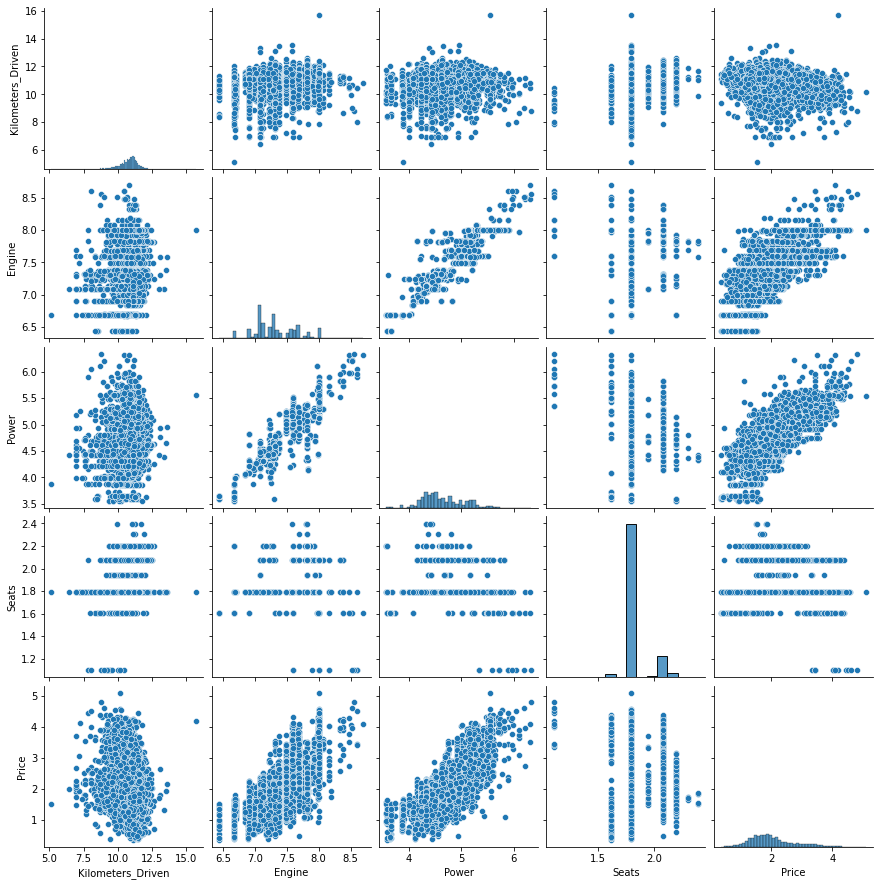

In [ ]:
# 1) 선형성 띄고 있는거 확인할 수 있음
sns.pairplot(data[int_list]);

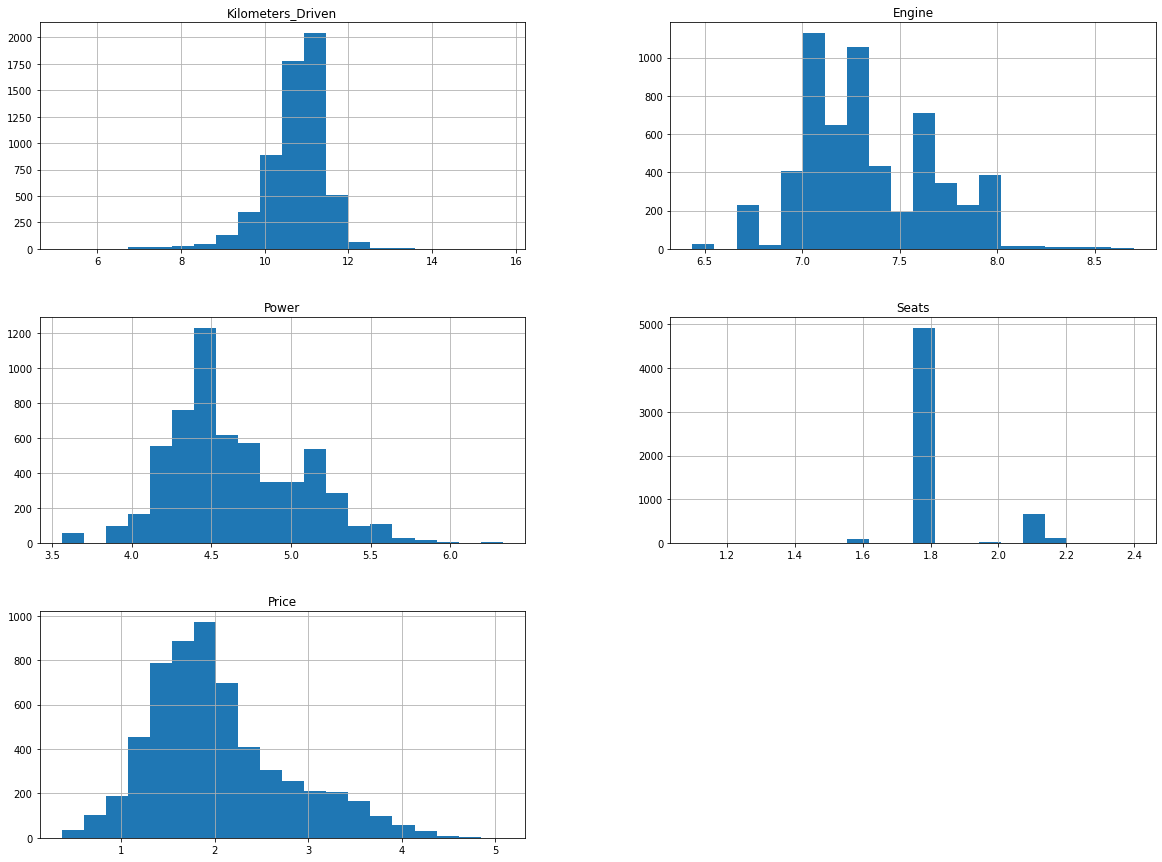

In [ ]:
# 2) 정규성
data[int_list].hist(bins=20, figsize=(20,15));
# 한쪽으로 치우치지 않고 정규성 띄고 있다 할 수 있음

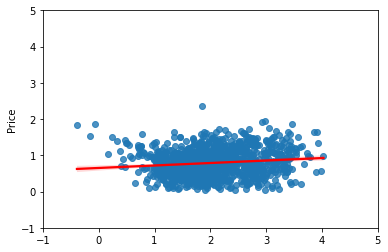

In [ ]:
# 3) 잔차의 등분산성
import scipy.stats

# 잔차 구하기
residual = y_test - test_pred
zs = scipy.stats.zscore(residual)

sns.regplot(test_pred, np.sqrt(np.abs(zs)), line_kws={'color': 'red'})
plt.xlim(-1,5)
plt.ylim(-1,5)
plt.show();
# band width가 일정해서 등분산성 가정 만족함.

In [ ]:
# 4) 독립성
# OLS Durbin-Watson 검정을 통하여, 독립하다고 판단할 수 있음.